# **Multiple Linear Regression**
## **Bike Sharing Assignment**
**Problem Statement:**

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:


*   Which variables are significant in predicting the demand for shared bikes.
*   How well those variables describe the bike demands

In [339]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [340]:
# Import necesssary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **Step 1: Reading, understanding and visualizing the data**

In [341]:
# Read the data

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [342]:
# Checking the shape of the dataframe

df.shape

(730, 16)

In [343]:
# Getting information about the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [344]:
# Describing the dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [345]:
# Checking for duplicates in the dataframe if any

df.duplicated().sum()

0

In [346]:
# Dropping the unwanted columns
# Dropping 'instant' column which is the row index
# Dropping 'dteday' column which is not a feature of the model
# Dropping 'casual' and 'registered' columns since they are the split of 'cnt' column

df.drop(['instant', 'dteday', 'casual', 'registered'], inplace= True, axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [347]:
df.shape

(730, 12)

In [348]:
# Replacing the categorical columns which are given as numeric to more meaningful form

df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

df['mnth'] = df['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep',
                              10:'oct', 11:'nov', 12:'dec'})
df['weekday'] = df['weekday'].map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

df['weathersit'] = df['weathersit'].map({1:'clear', 2:'mist', 3:'bad', 4:'severe'})

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [349]:
# Getting info of updated dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [350]:
# Getting categorical and numerical columns in a list

categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

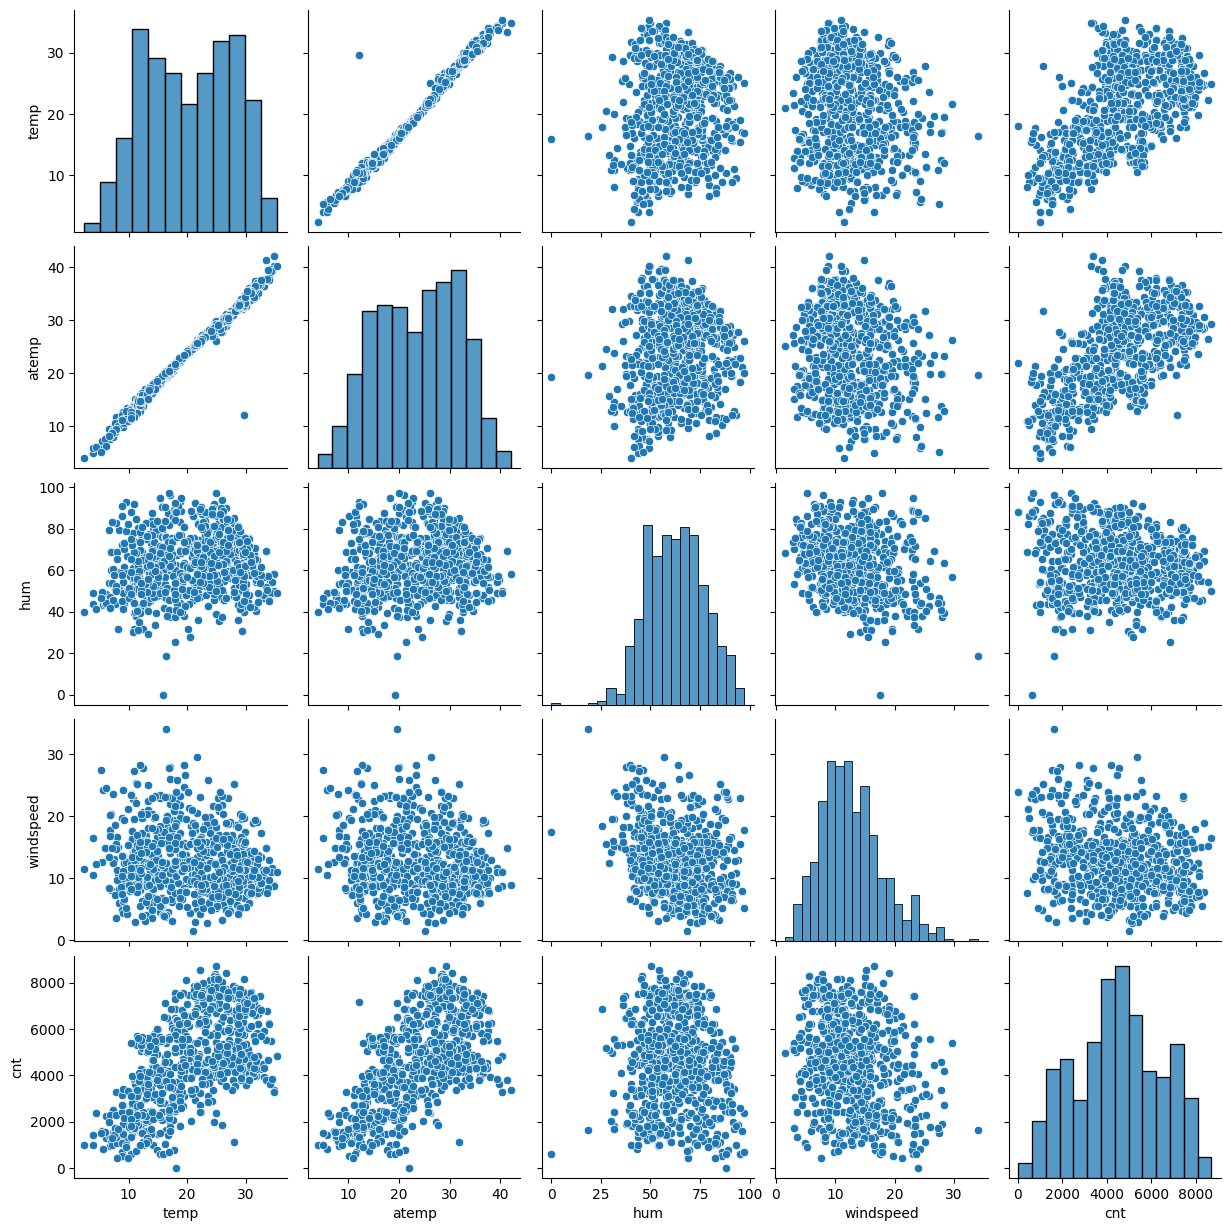

In [351]:
# Visualizing the numerical variables

sns.pairplot(data=df, vars=numerical_columns)
plt.show()

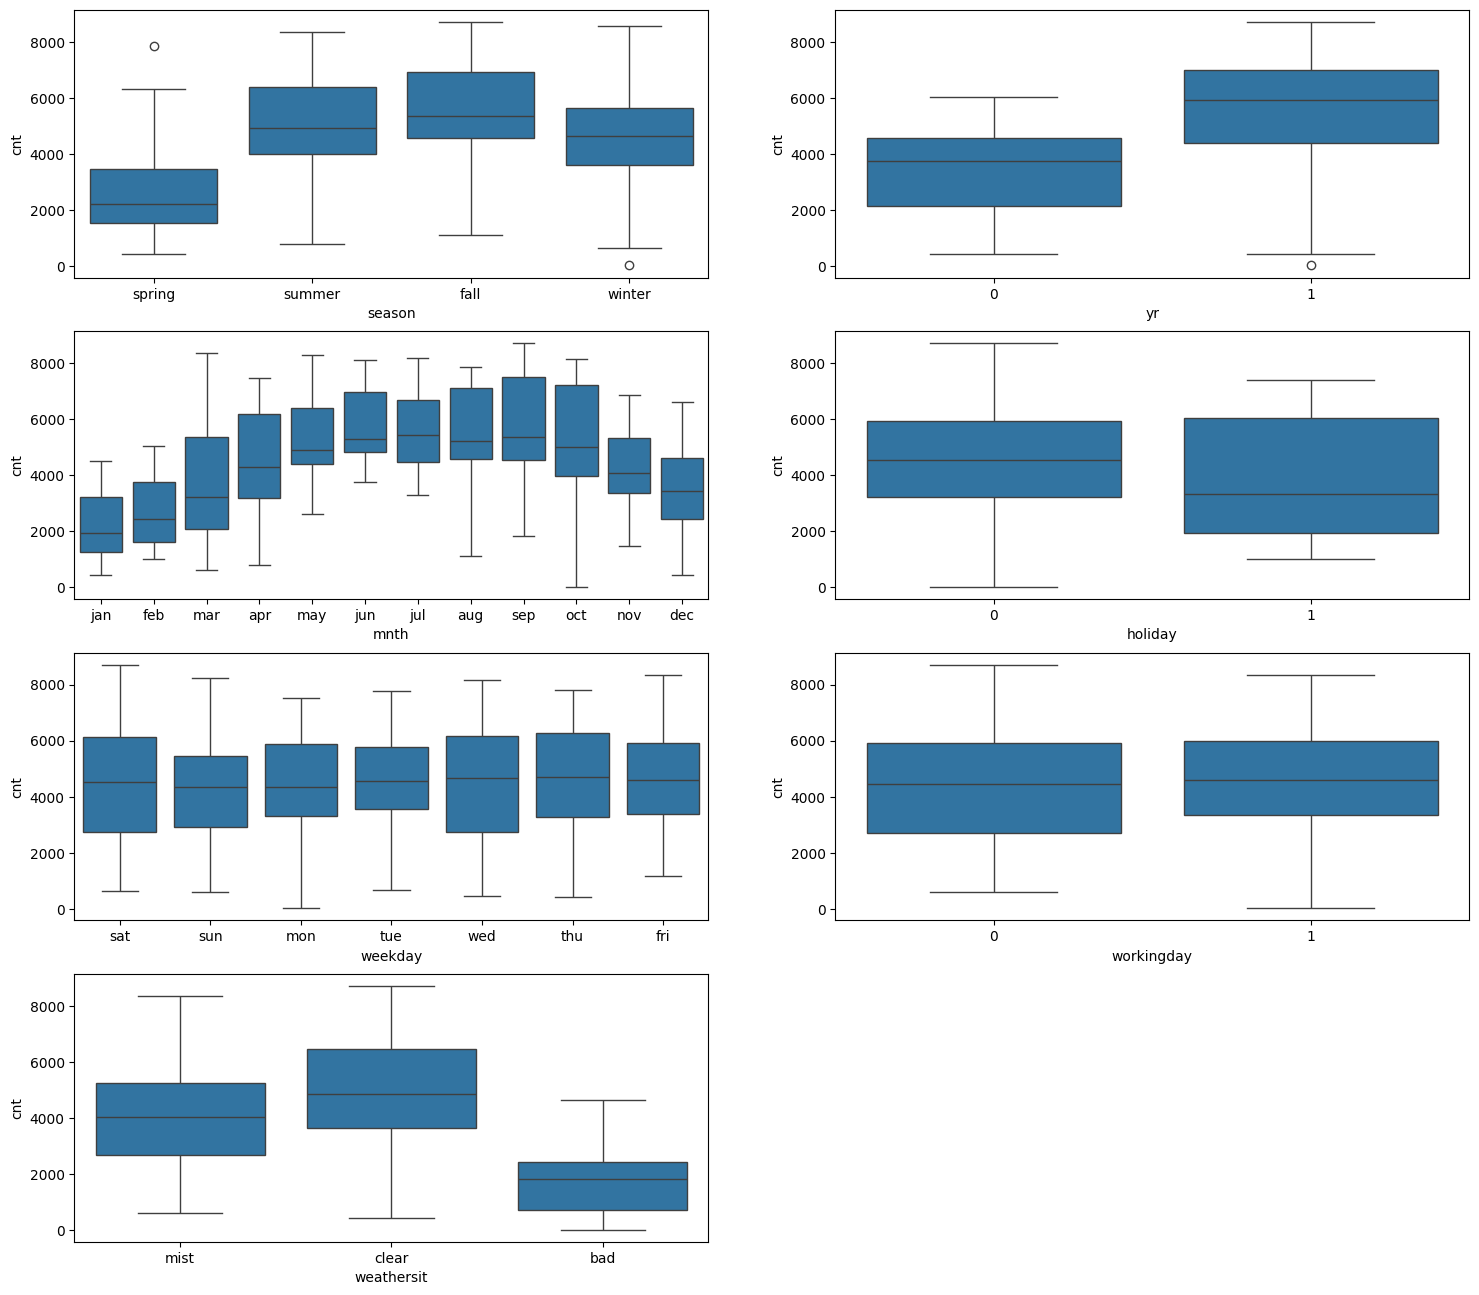

In [352]:
# Visualizing categorical variables with predictor variable

plt.figure(figsize=(18,16))
plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(4,2,2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(4,2,3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(4,2,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

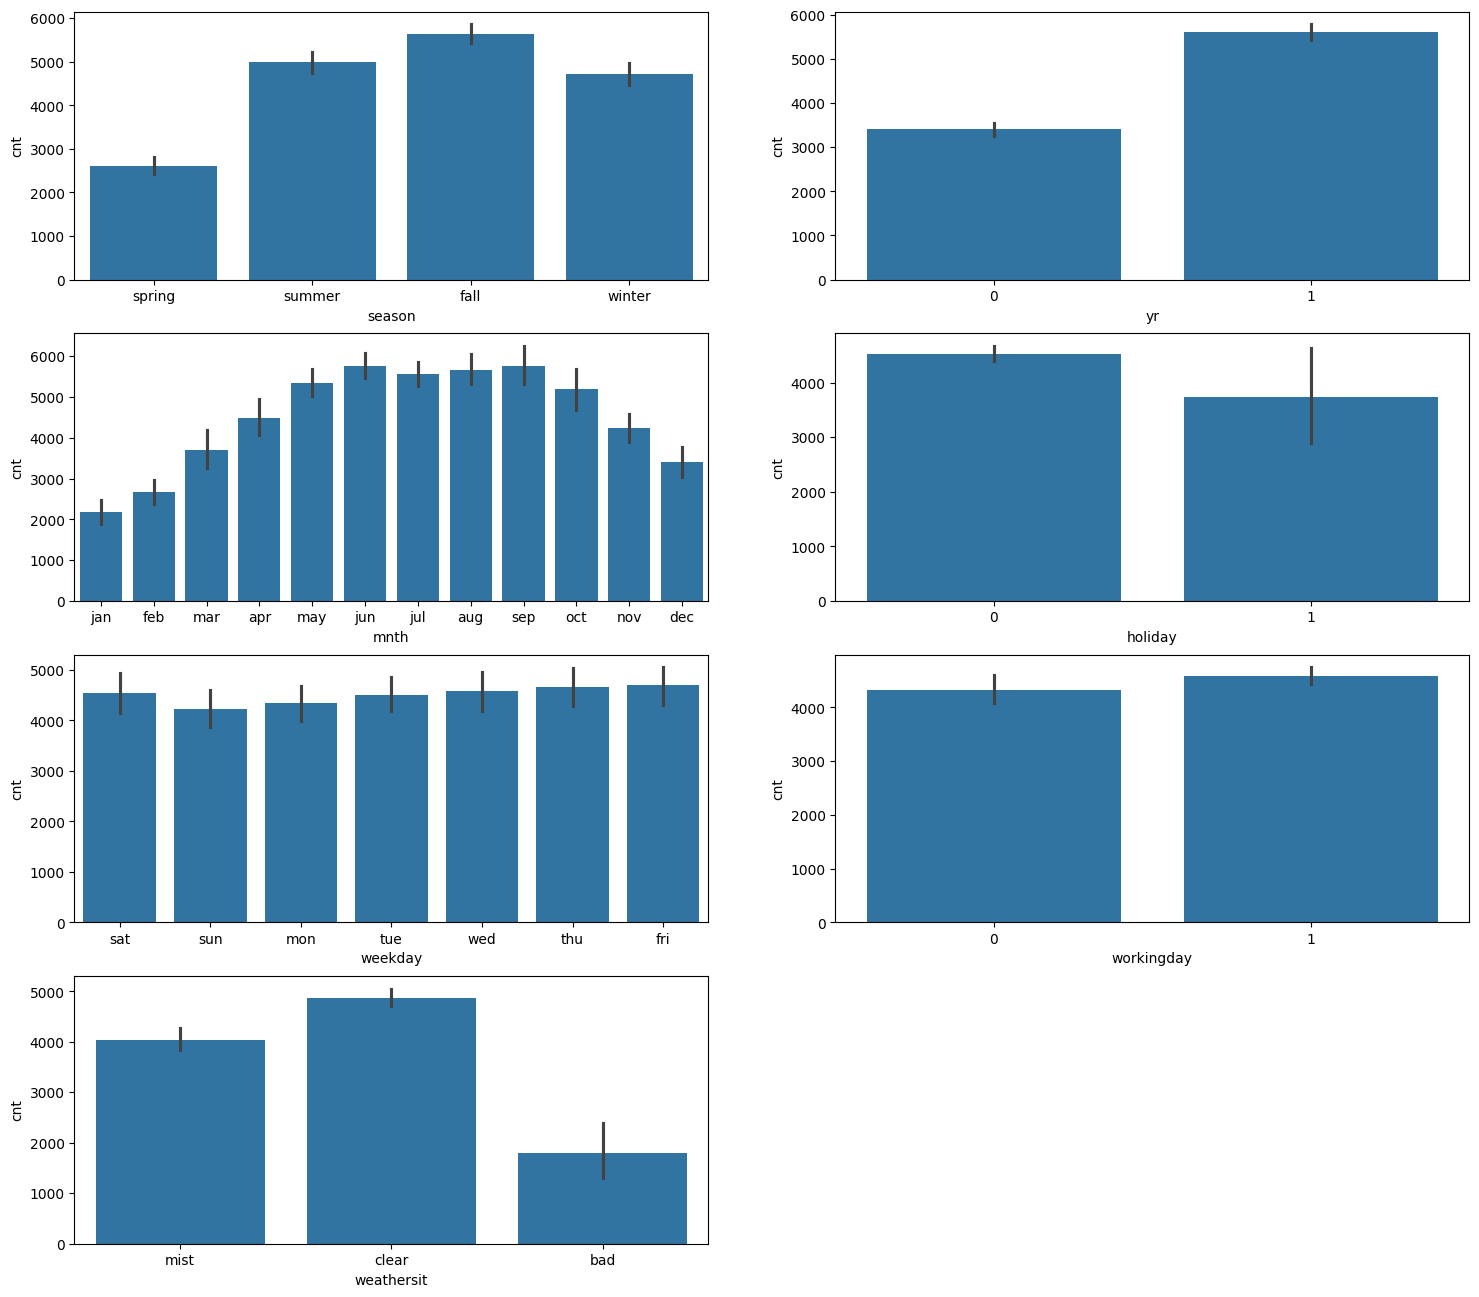

In [353]:
plt.figure(figsize=(18,16))
plt.subplot(4,2,1)
sns.barplot(x='season', y='cnt', data=df)
plt.subplot(4,2,2)
sns.barplot(x='yr', y='cnt', data=df)
plt.subplot(4,2,3)
sns.barplot(x='mnth', y='cnt', data=df)
plt.subplot(4,2,4)
sns.barplot(x='holiday', y='cnt', data=df)
plt.subplot(4,2,5)
sns.barplot(x='weekday', y='cnt', data=df)
plt.subplot(4,2,6)
sns.barplot(x='workingday', y='cnt', data=df)
plt.subplot(4,2,7)
sns.barplot(x='weathersit', y='cnt', data=df)
plt.show()

# **Step 2: Preparing the data for modelling**

###**Creating dummy variables**

In [354]:
# Creating dummy variables for categorical columns

season = pd.get_dummies(df['season'], drop_first=True, dtype=int)
month = pd.get_dummies(df['mnth'], drop_first=True, dtype=int)
weekday = pd.get_dummies(df['weekday'], drop_first=True, dtype=int)
weather = pd.get_dummies(df['weathersit'], drop_first=True, dtype=int)

In [355]:
# concatenating dummy variables and the dataframe

new_df = pd.concat([df, season, month, weekday, weather], axis=1)

new_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,clear,mist
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,1,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,1,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,1,0


In [356]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  spring      730 non-null    int64  
 13  summer      730 non-null    int64  
 14  winter      730 non-null    int64  
 15  aug         730 non-null    int64  
 16  dec         730 non-null    int64  
 17  feb         730 non-null    int64  
 18  jan         730 non-null    int64  
 19  jul         730 non-null    i

In [357]:
# Dropping unwanted variables as we have created dummy variables corresponding to those

new_df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

new_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,clear,mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [358]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    int64  
 9   summer      730 non-null    int64  
 10  winter      730 non-null    int64  
 11  aug         730 non-null    int64  
 12  dec         730 non-null    int64  
 13  feb         730 non-null    int64  
 14  jan         730 non-null    int64  
 15  jul         730 non-null    int64  
 16  jun         730 non-null    int64  
 17  mar         730 non-null    int64  
 18  may         730 non-null    int64  
 19  nov         730 non-null    i

###**Splitting traing and test set**

In [359]:
# Splitting train and test dataframe

df_train, df_test = train_test_split(new_df, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


###**Rescaling the features**

In [360]:
# Rescaling variables using Min-Max Scaler

scaler = MinMaxScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,clear,mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [361]:
# Describing rescaled dataframe

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,clear,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##**Step 4: Training the model**

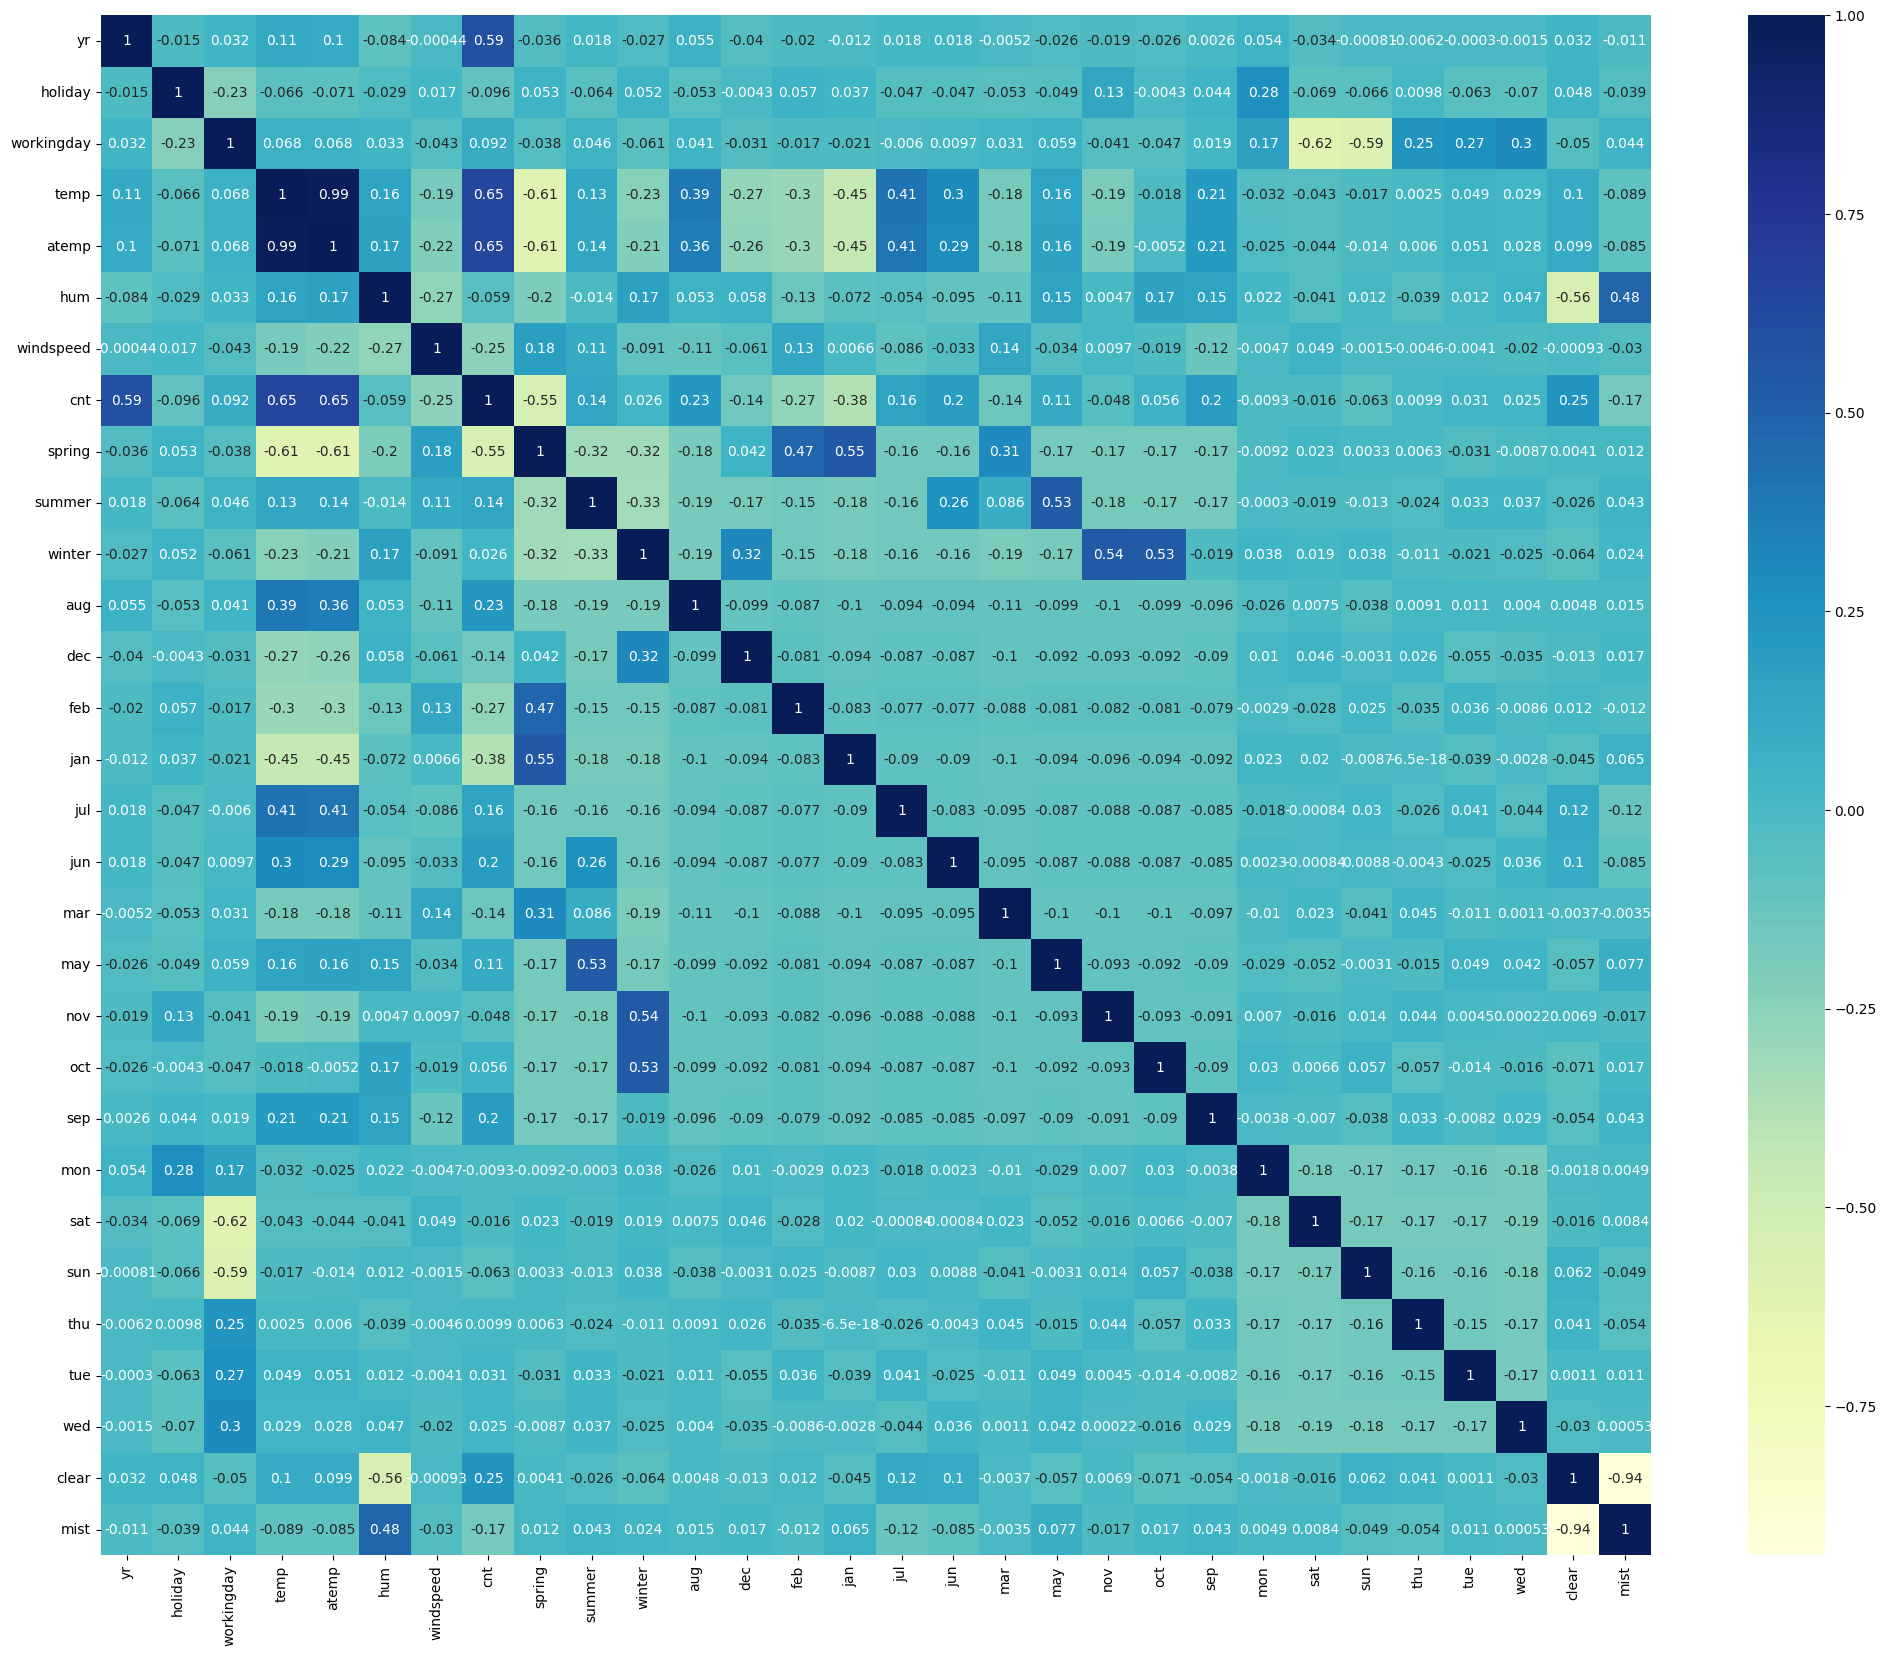

In [362]:
# Correlation headmap between the variables

plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), annot=True, cmap = "YlGnBu")
plt.show()

In [363]:
# Getting x_train and y_train

y_train = df_train.pop('cnt')
X_train = df_train

In [364]:
# Running RFE with 10 output variables

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 10)
rfe = rfe.fit(X_train, y_train)

In [365]:
# Variables selected using RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('aug', False, 3),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 3),
 ('mar', False, 3),
 ('may', False, 3),
 ('nov', False, 2),
 ('oct', False, 3),
 ('sep', True, 1),
 ('mon', False, 3),
 ('sat', True, 1),
 ('sun', False, 3),
 ('thu', False, 3),
 ('tue', False, 3),
 ('wed', False, 3),
 ('clear', True, 1),
 ('mist', True, 1)]

In [366]:
# Getting RFE selected variable in a list

col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'dec',
       'jan', 'jul', 'sep', 'sat', 'clear', 'mist'],
      dtype='object')

In [367]:
# Getting the variable which are rejected by RFE

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'summer', 'aug', 'feb', 'jun', 'mar', 'may',
       'nov', 'oct', 'mon', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

###**Building linear regression model using statsmodel for detailed statistics**

In [368]:
# Function for calculating VIF

def VIF_calculator(df):
  vif = pd.DataFrame()
  vif['Features'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = 'VIF', ascending = False)
  return vif

In [369]:
# Creating X_train with RFE selected variables

X_train_rfe = X_train[col_rfe]

# Adding constant variable for statsmodel and building the model

X_train_rfe_1 = sm.add_constant(X_train_rfe)

lm_1 = sm.OLS(y_train, X_train_rfe_1).fit()

print(lm_1.summary())

# Calculating VIF for lm_1

VIF_calculator(X_train_rfe)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.64e-187
Time:                        16:44:51   Log-Likelihood:                 508.34
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     495   BIC:                            -923.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1017      0.045      2.237      0.0

,Features,VIF
3,hum,22.14
2,temp,20.64
12,clear,12.65
13,mist,8.26
4,windspeed,4.33
5,spring,3.32
6,winter,2.34
0,yr,2.09
8,jan,1.77
9,jul,1.42


In this model, variable 'sat' seems to be insignificant as its P-value is high.

In [370]:
# Dropping 'sat' variable

X_train_rfe = X_train_rfe.drop(['sat'], axis=1)

# Building new model using statsmodel

X_train_rfe_2 = sm.add_constant(X_train_rfe)

lm_2 = sm.OLS(y_train, X_train_rfe_2).fit()

print(lm_2.summary())

# Calculating VIF

VIF_calculator(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.33e-188
Time:                        16:45:00   Log-Likelihood:                 506.95
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     496   BIC:                            -926.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1073      0.045      2.363      0.0

,Features,VIF
3,hum,22.14
2,temp,20.63
11,clear,12.64
12,mist,8.25
4,windspeed,4.30
5,spring,3.31
6,winter,2.34
0,yr,2.09
8,jan,1.77
9,jul,1.42


In this model, the variable 'dec' seems to be insinificant. Lets rebuild the model by dropping 'dec'.

In [371]:
# Dropping 'dec' variable

X_train_rfe = X_train_rfe.drop(['dec'], axis=1)

# Building new model using statsmodel

X_train_rfe_3 = sm.add_constant(X_train_rfe)

lm_3 = sm.OLS(y_train, X_train_rfe_3).fit()

print(lm_3.summary())

# Calculating VIF

VIF_calculator(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.21e-188
Time:                        16:45:03   Log-Likelihood:                 505.47
No. Observations:                 510   AIC:                            -984.9
Df Residuals:                     497   BIC:                            -929.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1052      0.045      2.312      0.0

,Features,VIF
3,hum,21.67
2,temp,19.65
10,clear,12.34
11,mist,8.15
4,windspeed,4.27
5,spring,3.30
6,winter,2.26
0,yr,2.09
7,jan,1.69
8,jul,1.41


Variable 'jan' is insignificant as its P-value is high.

In [372]:
# Dropping 'jan' variable

X_train_rfe = X_train_rfe.drop(['jan'], axis=1)

# Building new model using statsmodel

X_train_rfe_4 = sm.add_constant(X_train_rfe)

lm_4 = sm.OLS(y_train, X_train_rfe_4).fit()

print(lm_4.summary())

# Calculating VIF

VIF_calculator(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.85e-189
Time:                        16:45:15   Log-Likelihood:                 502.96
No. Observations:                 510   AIC:                            -981.9
Df Residuals:                     498   BIC:                            -931.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0973      0.046      2.138      0.0

,Features,VIF
3,hum,21.23
2,temp,18.57
9,clear,12.07
10,mist,8.03
4,windspeed,4.23
5,spring,3.04
6,winter,2.22
0,yr,2.08
7,jul,1.40
8,sep,1.20


VIF value of 'hum' is very high. Lets drop the variable.

In [373]:
# Dropping 'hum' variable

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

# Building new model using statsmodel

X_train_rfe_5 = sm.add_constant(X_train_rfe)

lm_5 = sm.OLS(y_train, X_train_rfe_5).fit()

print(lm_5.summary())

# Calculating VIF

VIF_calculator(X_train_rfe)



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.10e-186
Time:                        16:45:19   Log-Likelihood:                 494.07
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0323      0.034     -0.951      0.3

,Features,VIF
2,temp,12.25
8,clear,11.40
9,mist,6.33
3,windspeed,4.23
4,spring,2.56
0,yr,2.07
5,winter,1.70
6,jul,1.37
7,sep,1.20
1,holiday,1.04


Here, 'temp' variable has high VIF value but we have already observed that 'temp' variable has high correlation with our predictor variable 'cnt'. So let's try with 'clear' variable.

In [374]:
# Removing 'clear' variable

X_train_rfe = X_train_rfe.drop(['clear'], axis=1)

# Building new model using statsmodel

X_train_rfe_6 = sm.add_constant(X_train_rfe)

lm_6 = sm.OLS(y_train, X_train_rfe_6).fit()

print(lm_6.summary())

# Calculating VIF

VIF_calculator(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     206.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.05e-162
Time:                        16:45:24   Log-Likelihood:                 434.64
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     500   BIC:                            -806.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2442      0.027      9.088      0.0

,Features,VIF
2,temp,4.61
3,windspeed,3.93
0,yr,2.05
4,spring,1.64
8,mist,1.49
5,winter,1.36
6,jul,1.35
7,sep,1.20
1,holiday,1.04


##**Step 5: Residual Analysis**

In [375]:
# Prediction on train set

y_train_pred = lm_6.predict(X_train_rfe_6)

**Normal distribution**

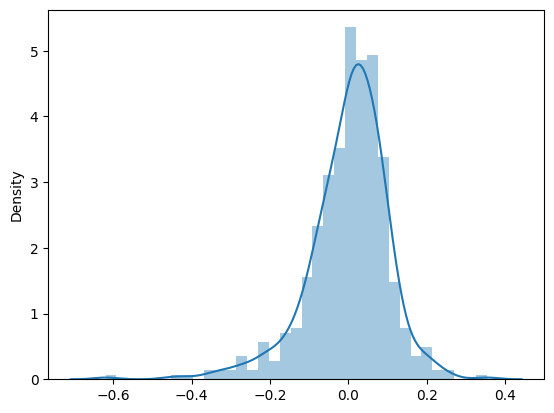

In [376]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

Errors terms are normally distributed with mean zero.

**Multi Collinearity**

In [377]:
# VIF Calculation

VIF_calculator(X_train_rfe)

,Features,VIF
2,temp,4.61
3,windspeed,3.93
0,yr,2.05
4,spring,1.64
8,mist,1.49
5,winter,1.36
6,jul,1.35
7,sep,1.20
1,holiday,1.04


Since the VIF values are less than 5, we can say there is no multicollinearity in the data.

##**Step 6: Prediction and evaluation on test set**

In [378]:
# Apply scaler to test data

df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,clear,mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,1,0


In [379]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,clear,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [380]:
# Getting X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [382]:
# Dropping the removed variables from the test data

X_test_new = X_test[X_train_rfe.columns]
X_test_new.head()

,yr,holiday,temp,windspeed,spring,winter,jul,sep,mist
184,0,1,0.831783,0.084219,0,0,1,0,1
535,1,0,0.901354,0.153728,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0


In [383]:
# Add constant to test set

X_test_sm = sm.add_constant(X_test_new)

X_test_sm.head()

,const,yr,holiday,temp,windspeed,spring,winter,jul,sep,mist
184,1.0,0,1,0.831783,0.084219,0,0,1,0,1
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0


In [384]:
# Predict

y_test_pred = lm_6.predict(X_test_sm)

In [385]:
# Evaluating R-Squared value

r2  = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.7794179126781043

###**Model Evaluation**

Text(0, 0.5, 'y_test_pred')

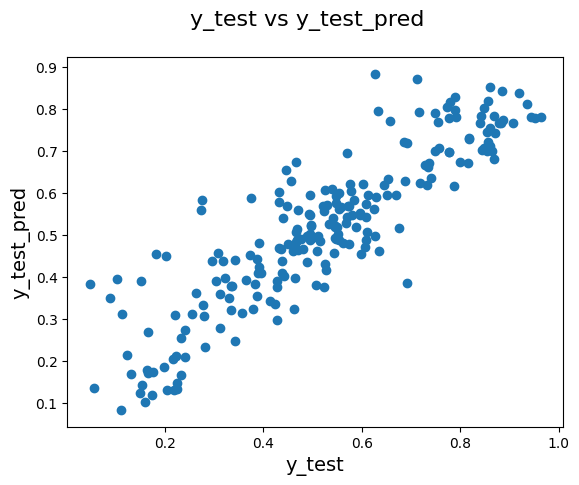

In [386]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 16)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_test_pred', fontsize = 14)

In [387]:
# Calculating Adjusted-R^2 value on the test data

adjusted_r2 = round(1-(1-r2)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1),4)
print(adjusted_r2)

0.77


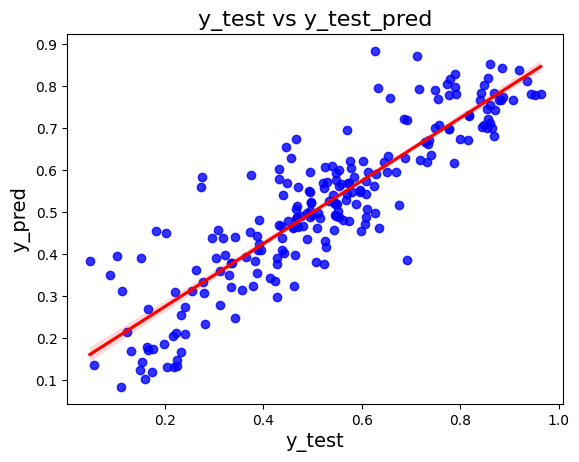

In [388]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=16)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_pred', fontsize=14)
plt.show()

##**Comparision of R-Squared values between training and test data**

*   Training data R^2           - 0.788
*   Test data R^2               - 0.779
*   Training data Adjusted R^2  - 0.784
*   Test data Adjusted R^2      - 0.77

# **Conclusion**

Significant variables to predict the demand for shared bikes are



*   temp
*   windspeed
*   year
*   season (spring, winter)
*   weathersit (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
*   month (july, september)
*   holiday